****Coursework 1****

Install Libraries

In [1]:
# pip install sklearn

In [2]:
# pip install numpy

In [3]:
# pip install pandas

In [4]:
# pip install matplotlib

In [5]:
# pip install opencv-python

In [6]:
# pip install opencv-contrib-python

In [7]:
# pip install opencv-python-headless

In [8]:
# pip install opencv-contrib-python-headless

In [9]:
# pip install scikit-learn

In [10]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Importing Required Libraries for the Coursework

In [11]:
import sys
assert sys.version_info >= (3,5)

In [12]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
import scipy.stats as stats

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
import time

In [19]:
import cv2

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from itertools import cycle

Importing all required tables

In [28]:
binary_class_x_train=pd.read_csv('./Traffic_Sign/Binary_Classification/x_train_bin.csv')
binary_class_y_train=pd.read_csv('./Traffic_Sign/Binary_Classification/y_train_bin.csv')
binary_class_x_test=pd.read_csv('./Traffic_Sign/Binary_Classification/x_test_bin.csv')
binary_class_y_test=pd.read_csv('./Traffic_Sign/Binary_Classification/y_test_bin.csv')

complete_x_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_train_all.csv')
complete_y_train=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_train_all.csv')
complete_x_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/x_test_all.csv')
complete_y_test=pd.read_csv('./Traffic_Sign/CompleteDataSet/y_test_all.csv')

onevsall_y_train_0=pd.read_csv('./Traffic_Sign/OnevrsAll/0_vrs_all/y_train_0.csv')
onevsall_y_train_1=pd.read_csv('./Traffic_Sign/OnevrsAll/1_vrs_all/y_train_1.csv')
onevsall_y_train_2=pd.read_csv('./Traffic_Sign/OnevrsAll/2_vrs_all/y_train_2.csv')
onevsall_y_train_3=pd.read_csv('./Traffic_Sign/OnevrsAll/3_vrs_all/y_train_3.csv')
onevsall_y_train_4=pd.read_csv('./Traffic_Sign/OnevrsAll/4_vrs_all/y_train_4.csv')
onevsall_y_train_5=pd.read_csv('./Traffic_Sign/OnevrsAll/5_vrs_all/y_train_5.csv')
onevsall_y_train_6=pd.read_csv('./Traffic_Sign/OnevrsAll/6_vrs_all/y_train_6.csv')
onevsall_y_train_7=pd.read_csv('./Traffic_Sign/OnevrsAll/7_vrs_all/y_train_7.csv')
onevsall_y_train_8=pd.read_csv('./Traffic_Sign/OnevrsAll/8_vrs_all/y_train_8.csv')
onevsall_y_train_9=pd.read_csv('./Traffic_Sign/OnevrsAll/9_vrs_all/y_train_9.csv')

def inverse_num(i):
    if i == 1: return 0
    else: return 1

onevsall_y_train_0 = [[inverse_num(i)] for i in onevsall_y_train_0.copy().to_numpy()]
onevsall_y_train_1 = [[inverse_num(i)] for i in onevsall_y_train_1.copy().to_numpy()]
onevsall_y_train_2 = [[inverse_num(i)] for i in onevsall_y_train_2.copy().to_numpy()]
onevsall_y_train_3 = [[inverse_num(i)] for i in onevsall_y_train_3.copy().to_numpy()]
onevsall_y_train_4 = [[inverse_num(i)] for i in onevsall_y_train_4.copy().to_numpy()]
onevsall_y_train_5 = [[inverse_num(i)] for i in onevsall_y_train_5.copy().to_numpy()]
onevsall_y_train_6 = [[inverse_num(i)] for i in onevsall_y_train_6.copy().to_numpy()]
onevsall_y_train_7 = [[inverse_num(i)] for i in onevsall_y_train_7.copy().to_numpy()]
onevsall_y_train_8 = [[inverse_num(i)] for i in onevsall_y_train_8.copy().to_numpy()]
onevsall_y_train_9 = [[inverse_num(i)] for i in onevsall_y_train_9.copy().to_numpy()]

Description of the datasets used

In [29]:
complete_x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [30]:
complete_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [31]:
complete_x_train.shape

(9690, 2304)

In [32]:
complete_y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [33]:
complete_y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [34]:
complete_x_train.shape

(9690, 2304)

In [35]:
complete_x_train.isnull().values.any()

False

In [36]:
complete_y_train.isnull().values.any()

False

In [37]:
complete_x_test.isnull().values.any()

False

In [38]:
complete_y_test.isnull().values.any()

False

In [39]:
complete_x_train.duplicated().any()

False

In [40]:
complete_x_test.duplicated().any()

False

Visualisation of Images of different classes

In [41]:
def visualize_image(num):
    plt.imshow(complete_x_train.iloc[num].to_numpy().reshape(48,48),cmap="grey")

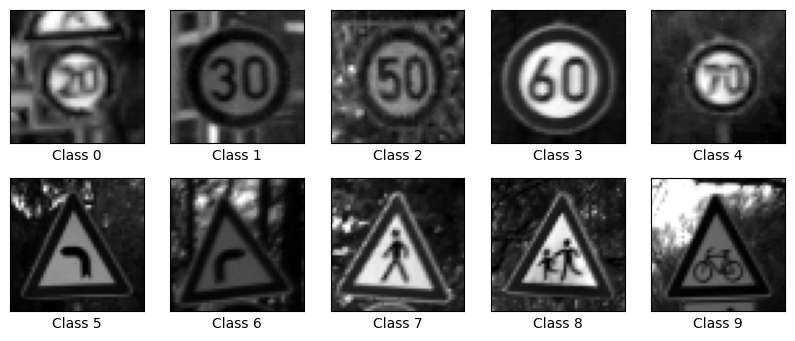

In [42]:
img_toshow = [0,210,2435,6085,7030,8275,8635,8875,9415,9685]

plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

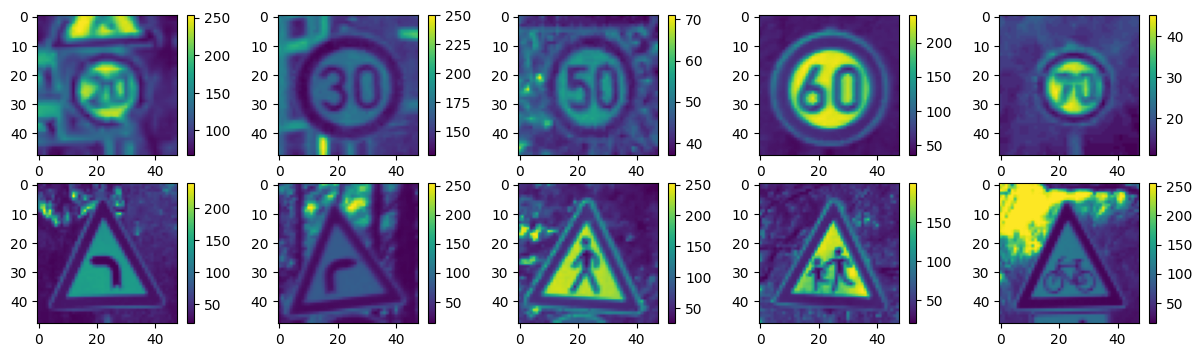

In [43]:
plt.figure(figsize=(15,4))
for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.grid(False)
    plt.imshow(complete_x_train.iloc[img_toshow[i]].to_numpy().reshape(48,48))
    plt.colorbar()
    plt.grid(False)

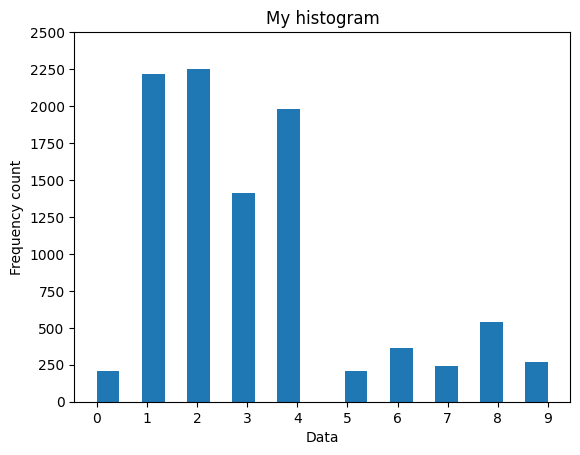

In [44]:
plt.hist(complete_y_train["0"],bins=20)
plt.ylabel('Frequency count')
plt.xlabel('Data')
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.yticks([0,250,500,750,1000,1250,1500,1750,2000,2250,2500])
plt.title('My histogram')
plt.show()

Data Preperation

Normalising the pixel values

In [45]:
complete_x_train = complete_x_train.copy().astype('float') / 255
complete_x_test = complete_x_test.copy().astype('float') / 255

Removing the noise from the data

In [46]:
def img_denoiser(arr): 
    pixel_array = arr
    reshaped_array = pixel_array.reshape((48, 48)) 
    normalized_array = np.uint8(reshaped_array * 255)
    if normalized_array.ndim != 2:
        raise ValueError("The image should have 2 dimensions") 
    thresholded_image = cv2.adaptiveThreshold(normalized_array, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresholded_image

In [47]:
complete_x_train_denoise = np.apply_along_axis(
    func1d=lambda img: img_denoiser(img),
    axis=1, arr=complete_x_train.copy()).reshape(-1, 48*48)

complete_x_test_denoise = np.apply_along_axis(
    func1d=lambda img: img_denoiser(img),
    axis=1, arr=complete_x_test.copy()).reshape(-1, 48*48)

In [48]:
complete_x_train_denoise = pd.DataFrame(complete_x_train_denoise.astype('float') / 255)
complete_x_test_denoise = pd.DataFrame(complete_x_test_denoise.astype('float') / 255)

Comparing the normal and denoised image

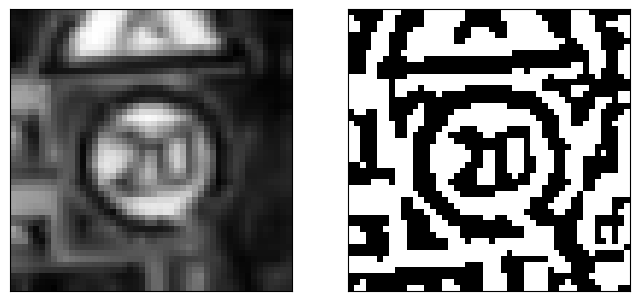

In [49]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(complete_x_train.iloc[0].to_numpy().reshape(48,48),'gray')
plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(complete_x_train_denoise.iloc[0].to_numpy().reshape(48,48),'gray')

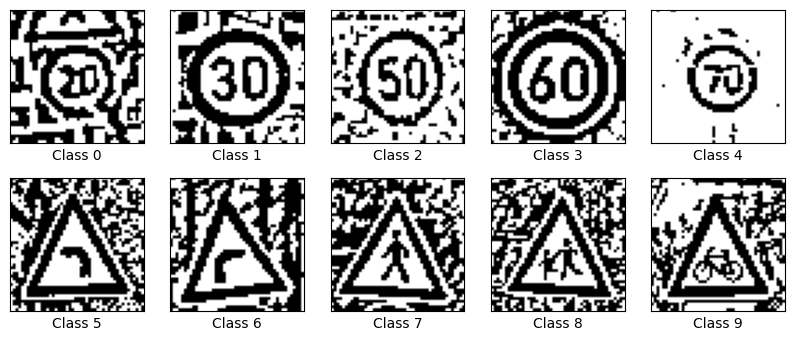

In [50]:
plt.figure(figsize=(10,4))

for i in range (0, len(img_toshow)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(complete_x_train_denoise.iloc[img_toshow[i]].to_numpy().reshape(48,48), cmap='gray')
    plt.xlabel("Class "+str(complete_y_train.iloc[img_toshow[i]].to_numpy()[0]))

Data Preperation for Naive Bayes Classifier

In [51]:
joined_dataset = complete_x_train_denoise.copy()
joined_dataset['class']=complete_y_train.copy()

Balancing out dataset using upper and lower stratification

In [52]:
grouped_dataset = joined_dataset.groupby('class', group_keys=False)
avg_val = int(grouped_dataset['class'].value_counts().mean())

In [53]:
balanced_dataset = pd.DataFrame()

for i in range(0,10):
    if (len(joined_dataset[joined_dataset['class']==i])<=avg_val):
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val, replace=True)])
    else:
        balanced_dataset = pd.concat([balanced_dataset, joined_dataset[joined_dataset['class']==i].sample(avg_val)])

balanced_dataset_x = balanced_dataset.iloc[:,:2304]
balanced_dataset_y = balanced_dataset.iloc[:,2304:]

In [54]:
complete_y_train.groupby('0').value_counts()

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: count, dtype: int64

In [55]:
balanced_dataset_y.groupby('class').value_counts()

class
0    969
1    969
2    969
3    969
4    969
5    969
6    969
7    969
8    969
9    969
Name: count, dtype: int64

Removing Outliers

In [56]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.2)
    Q3 = df.quantile(0.8)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return trueList

In [57]:
no_outlier_train = Remove_Outlier_Indices(balanced_dataset_x.copy())
no_outlier_test = Remove_Outlier_Indices(complete_x_test_denoise.copy())

In [58]:
no_outlier_dataset_train = balanced_dataset_x[no_outlier_train]
no_outlier_dataset_test = complete_x_test_denoise[no_outlier_test]

no_outlier_dataset_train = no_outlier_dataset_train.fillna(0)
no_outlier_dataset_test = no_outlier_dataset_test.fillna(0)

**Running Naive Bayes on balanced dataset**

Functions for Naive Bayes

In [59]:
def init_train_classifier(classifier, dataset_train_x, dataset_train_y):
    clf = None
    if classifier == "gaussian":
        clf = GaussianNB()
    elif classifier == "multinomial":
        clf = MultinomialNB()
    elif classifier == "complement":
        clf = ComplementNB()
    else:
        raise ValueError(f"Unknown classifier: {classifier}")
    clf.fit(dataset_train_x, dataset_train_y)
    return clf

def run_naivebayes(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    y_score = clf.predict_proba(dataset_test_x)
    ret_arr = [
        accuracy_score(dataset_test_y, complete_y_pred), 
        precision_score(dataset_test_y, complete_y_pred, average='weighted'), 
        recall_score(dataset_test_y, complete_y_pred, average='weighted'),
        f1_score(dataset_test_y, complete_y_pred, average='weighted'),
        roc_auc_score(dataset_test_y, y_score, multi_class='ovr', average='weighted')
    ]
    return ret_arr

def get_confusion_matrix(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    return confusion_matrix(dataset_test_y, complete_y_pred)

def get_classification_report(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    complete_y_pred = clf.predict(dataset_test_x)
    print(classification_report(dataset_test_y, complete_y_pred))
    
def get_roc(classifier, dataset_train_x, dataset_train_y, dataset_test_x, dataset_test_y):
    clf = init_train_classifier(classifier, dataset_train_x, dataset_train_y)
    y_score = clf.predict_proba(dataset_test_x)
    n_classes = len(set(dataset_train_y))
    
    dataset_test_y_bin = label_binarize(dataset_test_y, classes=list(range(n_classes)))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(dataset_test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return [roc_auc, n_classes, fpr, tpr]

Using Gaussian Naive Bayes

In [60]:
conf_matrix = get_confusion_matrix('gaussian',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)
final_values = run_naivebayes('gaussian',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

In [61]:
print("Accuracy Score : ",final_values[0])
print("Precision Score : ",final_values[1])
print("Recall Score : ",final_values[2])
print("F1 Score : ",final_values[3])
print("Area under ROC : ",final_values[4])

Accuracy Score :  0.4812297734627832
Precision Score :  0.5171821725485103
Recall Score :  0.4812297734627832
F1 Score :  0.4891929469287897
Area under ROC :  0.8139318051517128


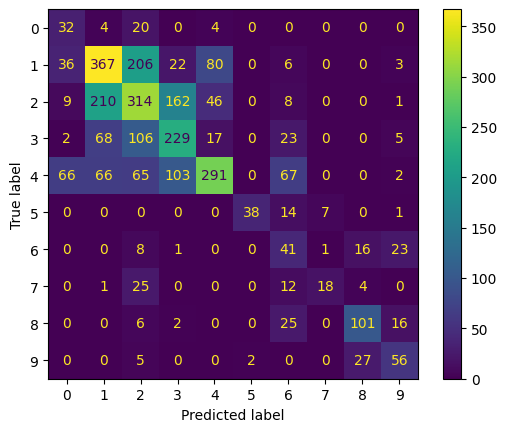

In [62]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [63]:
get_classification_report('gaussian',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

              precision    recall  f1-score   support

           0       0.22      0.53      0.31        60
           1       0.51      0.51      0.51       720
           2       0.42      0.42      0.42       750
           3       0.44      0.51      0.47       450
           4       0.66      0.44      0.53       660
           5       0.95      0.63      0.76        60
           6       0.21      0.46      0.29        90
           7       0.69      0.30      0.42        60
           8       0.68      0.67      0.68       150
           9       0.52      0.62      0.57        90

    accuracy                           0.48      3090
   macro avg       0.53      0.51      0.50      3090
weighted avg       0.52      0.48      0.49      3090



Using Multinomial Naive Bayes

In [64]:
conf_matrix = get_confusion_matrix('multinomial',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)
final_values = run_naivebayes('multinomial',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

In [65]:
print("Accuracy Score : ",final_values[0])
print("Precision Score : ",final_values[1])
print("Recall Score : ",final_values[2])
print("F1 Score : ",final_values[3])
print("Area under ROC : ",final_values[4])

Accuracy Score :  0.415210355987055
Precision Score :  0.4744319637628002
Recall Score :  0.415210355987055
F1 Score :  0.42770806956970514
Area under ROC :  0.7773206400263959


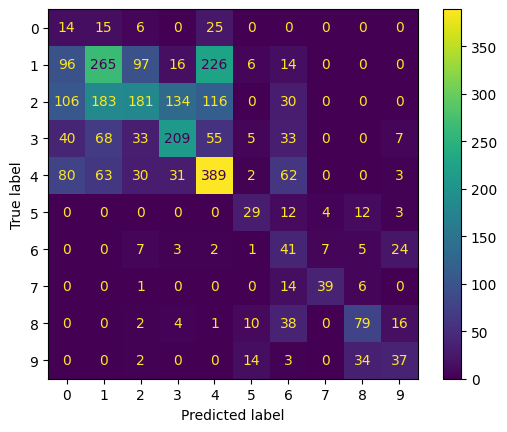

In [66]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [67]:
get_classification_report('multinomial',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

              precision    recall  f1-score   support

           0       0.04      0.23      0.07        60
           1       0.45      0.37      0.40       720
           2       0.50      0.24      0.33       750
           3       0.53      0.46      0.49       450
           4       0.48      0.59      0.53       660
           5       0.43      0.48      0.46        60
           6       0.17      0.46      0.24        90
           7       0.78      0.65      0.71        60
           8       0.58      0.53      0.55       150
           9       0.41      0.41      0.41        90

    accuracy                           0.42      3090
   macro avg       0.44      0.44      0.42      3090
weighted avg       0.47      0.42      0.43      3090



Using Complement Naive Bayes

In [68]:
conf_matrix = get_confusion_matrix('complement',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)
final_values = run_naivebayes('complement',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

In [69]:
print("Accuracy Score : ",final_values[0])
print("Precision Score : ",final_values[1])
print("Recall Score : ",final_values[2])
print("F1 Score : ",final_values[3])
print("Area under ROC : ",final_values[4])

Accuracy Score :  0.34045307443365697
Precision Score :  0.5048227993112213
Recall Score :  0.34045307443365697
F1 Score :  0.35567520044579154
Area under ROC :  0.7624916268319991


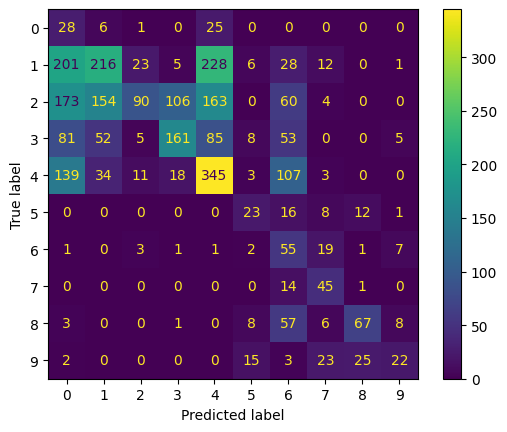

In [70]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()

In [71]:
get_classification_report('complement',no_outlier_dataset_train, balanced_dataset_y, no_outlier_dataset_test, complete_y_test)

              precision    recall  f1-score   support

           0       0.04      0.47      0.08        60
           1       0.47      0.30      0.37       720
           2       0.68      0.12      0.20       750
           3       0.55      0.36      0.43       450
           4       0.41      0.52      0.46       660
           5       0.35      0.38      0.37        60
           6       0.14      0.61      0.23        90
           7       0.38      0.75      0.50        60
           8       0.63      0.45      0.52       150
           9       0.50      0.24      0.33        90

    accuracy                           0.34      3090
   macro avg       0.41      0.42      0.35      3090
weighted avg       0.50      0.34      0.36      3090



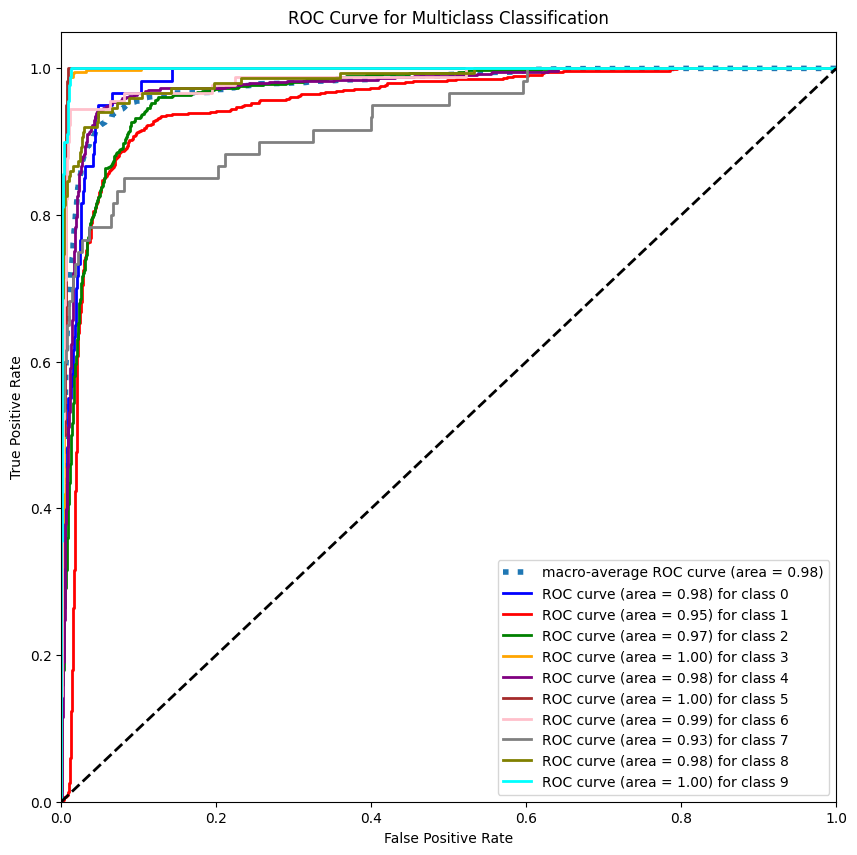

In [80]:
y_test_binarized = label_binarize(complete_y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_binarized.shape[1]

classifier = OneVsRestClassifier(LogisticRegression()) 
y_score = classifier.fit(complete_x_train, complete_y_train).decision_function(complete_x_test)

fpr=dict()
tpr=dict()
roc_auc=dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 10  # assuming 10 classes

# Calculate macro-average ROC AUC
roc_auc_macro = auc(all_fpr, mean_tpr)

#Plot ROC curve 
plt.figure(figsize=(10,10))
plt.plot(all_fpr, mean_tpr, label=f'macro-average ROC curve (area = {roc_auc_macro:0.2f})', linestyle=':', linewidth=4)

colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = {:.2f}) for class {}'.format(roc_auc[i], i))

plt.plot([0, 1], [0, 1], 'k--', lw=2) #dashed line represents the diagonal (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

**Extracting Top Features using correlation**

In [73]:
class_arr_data = [
                onevsall_y_train_0.copy(),
                onevsall_y_train_1.copy(),
                onevsall_y_train_2.copy(),
                onevsall_y_train_3.copy(),
                onevsall_y_train_4.copy(),
                onevsall_y_train_5.copy(),
                onevsall_y_train_6.copy(),
                onevsall_y_train_7.copy(),
                onevsall_y_train_8.copy(),
                onevsall_y_train_9.copy()
            ]

x_data = complete_x_train_denoise.copy()

Function to get Top Features

In [74]:
def topFeatureExtractionMethod1(x,dataset,arr):
    return_arr = []
    for i in arr:
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(arr))
        fit = bestfeatures.fit(dataset,i)
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(dataset.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        return_arr = np.unique(np.concatenate((return_arr,featureScores.nlargest(x//len(arr),'Score')['Specs']),0))
    return return_arr

In [75]:
def topFeatureExtractionMethod2(x,dataset,arr):
    features_array = [[]]*10
    return_arr = [[]]*3
    for i in range (0,len(arr)):
        bestfeatures = SelectKBest(score_func=chi2, k=x//len(arr))
        fit = bestfeatures.fit(dataset,arr[i])
        dfscores = pd.DataFrame(fit.scores_)
        dfcolumns = pd.DataFrame(dataset.columns)
        featureScores = pd.concat([dfcolumns,dfscores],axis=1)
        featureScores.columns = ['Specs','Score']
        features_array[i]=featureScores.nlargest(x//len(arr),'Score')['Specs']
    for i in range (0,10):
        return_arr[0] = np.unique(np.concatenate((return_arr[0], features_array[i][0:x//len(arr)]),0))
        return_arr[1] = np.unique(np.concatenate((return_arr[1], features_array[i][0:x//(len(arr)*2)]),0))
        return_arr[2] = np.unique(np.concatenate((return_arr[2], features_array[i][0:x//(len(arr)*4)]),0))
    return return_arr

Spliting Datasets based on top features

In [76]:
dataset1_method1 = topFeatureExtractionMethod1(400,x_data,class_arr_data)
dataset2_method1 = topFeatureExtractionMethod1(200,x_data,class_arr_data)
dataset3_method1 = topFeatureExtractionMethod1(125,x_data,class_arr_data)

dataset1_method1 = [int(i) for i in dataset1_method1]
dataset2_method1 = [int(i) for i in dataset2_method1]
dataset3_method1 = [int(i) for i in dataset3_method1]

datasets_method2 = topFeatureExtractionMethod2(700,x_data,class_arr_data)
dataset1_method2 = [int(i) for i in datasets_method2[0]]
dataset2_method2 = [int(i) for i in datasets_method2[1]]
dataset3_method2 = [int(i) for i in datasets_method2[2]]

In [77]:
datasets = [
    [(no_outlier_dataset_train[dataset1_method1], no_outlier_dataset_test[dataset1_method1]), 
     (no_outlier_dataset_train[dataset2_method1], no_outlier_dataset_test[dataset2_method1]), 
     (no_outlier_dataset_train[dataset3_method1], no_outlier_dataset_test[dataset3_method1])],
    [(no_outlier_dataset_train[dataset1_method2], no_outlier_dataset_test[dataset1_method2]), 
     (no_outlier_dataset_train[dataset2_method2], no_outlier_dataset_test[dataset2_method2]), 
     (no_outlier_dataset_train[dataset3_method2], no_outlier_dataset_test[dataset3_method2])]
]

bayes = ["gaussian", "multinomial", "complement"]

for i in range (0,len(datasets)):
    print("*"*100)
    print("Using Method ",i+1)
    print("*"*100)
    for j in range (0,len(datasets[i])):
        print("Dataset",i+1,"Method",j+1)
        for k in range (0,len(bayes)):
            temp = run_naivebayes(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            print("\t",bayes[k].capitalize(),"Naive Bayes","\n\t\tAccuracy :",temp[0],"\n\t\tPrecision :",temp[1],"\n\t\tRecall Score :",temp[2],"\n\t\tF1 Score :",temp[3],"\n\t\tArea under ROC :",temp[4])

****************************************************************************************************
Using Method  1
****************************************************************************************************
Dataset 1 Method 1
	 Gaussian Naive Bayes 
		Accuracy : 0.7352750809061489 
		Precision : 0.7683591391962721 
		Recall Score : 0.7352750809061489 
		F1 Score : 0.7383107424802448 
		Area under ROC : 0.9362880049729064
	 Multinomial Naive Bayes 
		Accuracy : 0.6896440129449838 
		Precision : 0.7223809815300218 
		Recall Score : 0.6896440129449838 
		F1 Score : 0.696360142074661 
		Area under ROC : 0.9204539030643136
	 Complement Naive Bayes 
		Accuracy : 0.598705501618123 
		Precision : 0.7266374257526517 
		Recall Score : 0.598705501618123 
		F1 Score : 0.638663114423837 
		Area under ROC : 0.8908622875736336
Dataset 1 Method 2
	 Gaussian Naive Bayes 
		Accuracy : 0.7275080906148867 
		Precision : 0.754112863574931 
		Recall Score : 0.7275080906148867 
		F1 Score : 0.7311

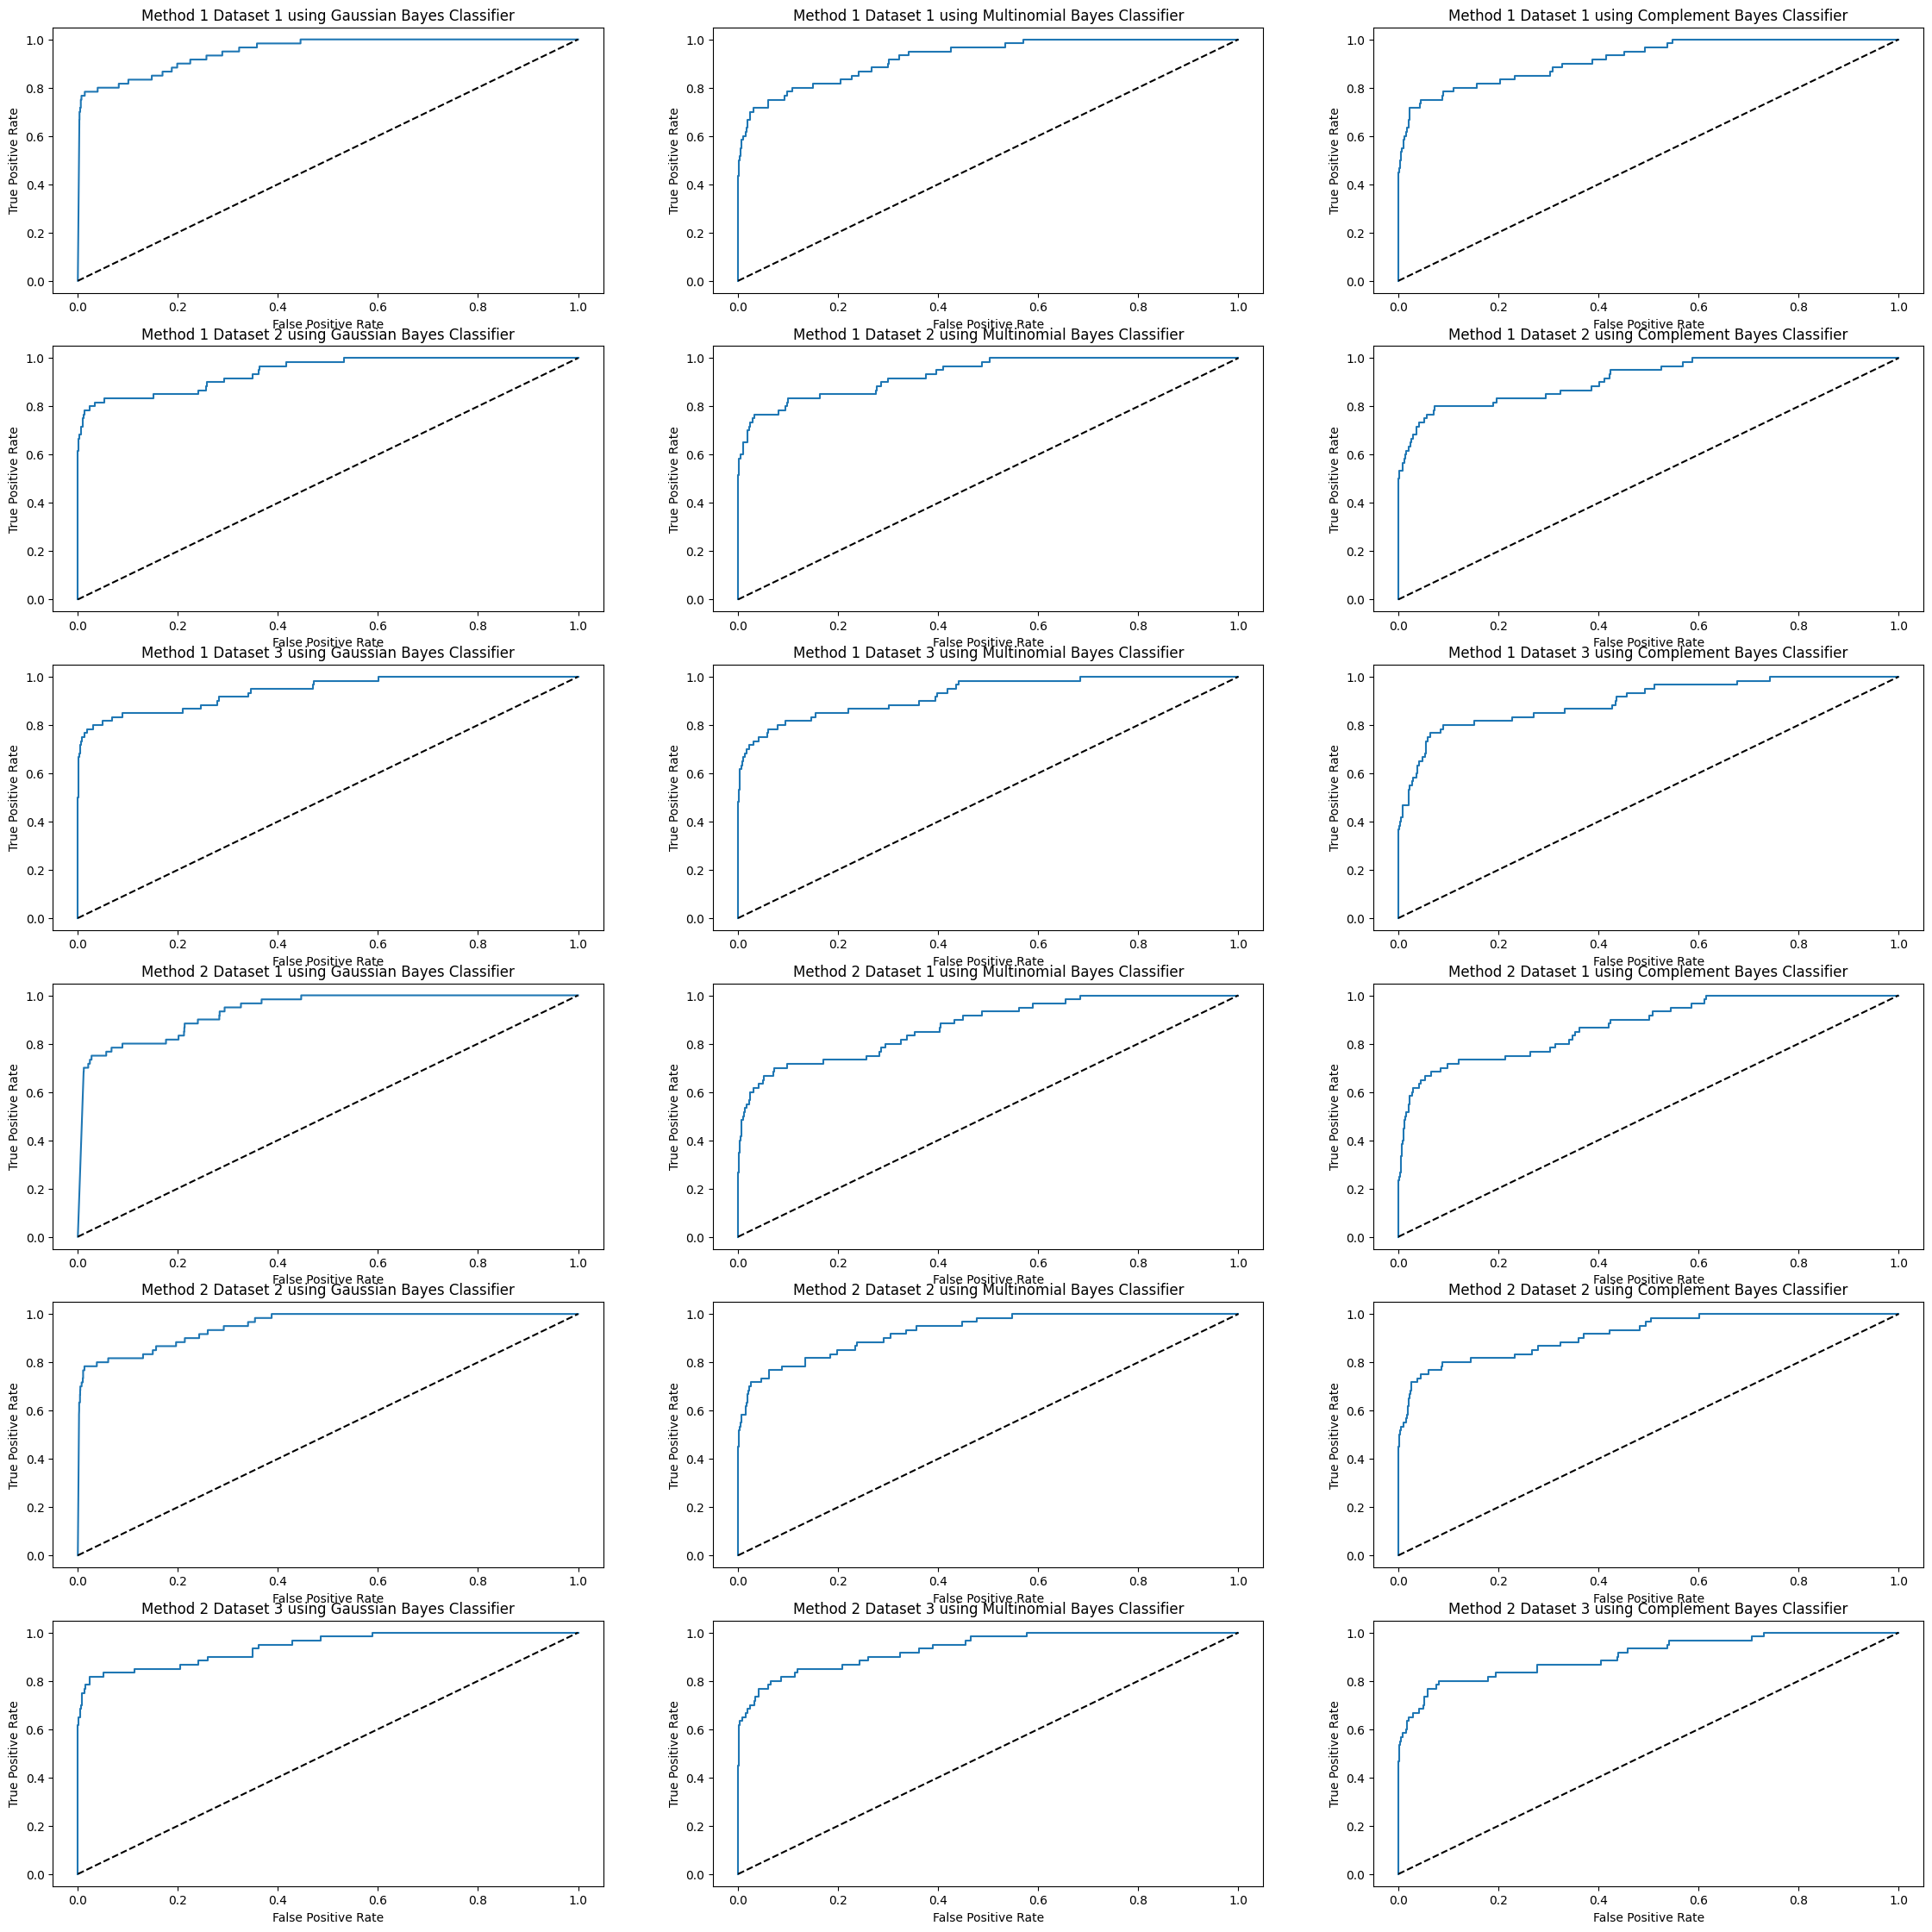

In [78]:
fig, axes = plt.subplots(6,3,figsize=(28,28))
t = 0
for i in range (0,len(datasets)):
    for j in range (0,len(datasets[i])):
        for k in range (0,len(bayes)):
            valuesS = get_roc(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            for l in range(valuesS[1]):
                axes[t,k].plot(valuesS[2][l], valuesS[3][l],label=f'ROC curve of class {l} (area = {valuesS[0][l]:0.2f})')
            axes[t,k].plot([0, 1], [0, 1], 'k--')
            axes[t,k].set_title("Method "+str(i+1)+" Dataset "+str(j+1)+" using "+bayes[k].capitalize()+" Bayes Classifier")
            axes[t,k].set_ylabel('True Positive Rate')
            axes[t,k].set_xlabel('False Positive Rate')
        t += 1

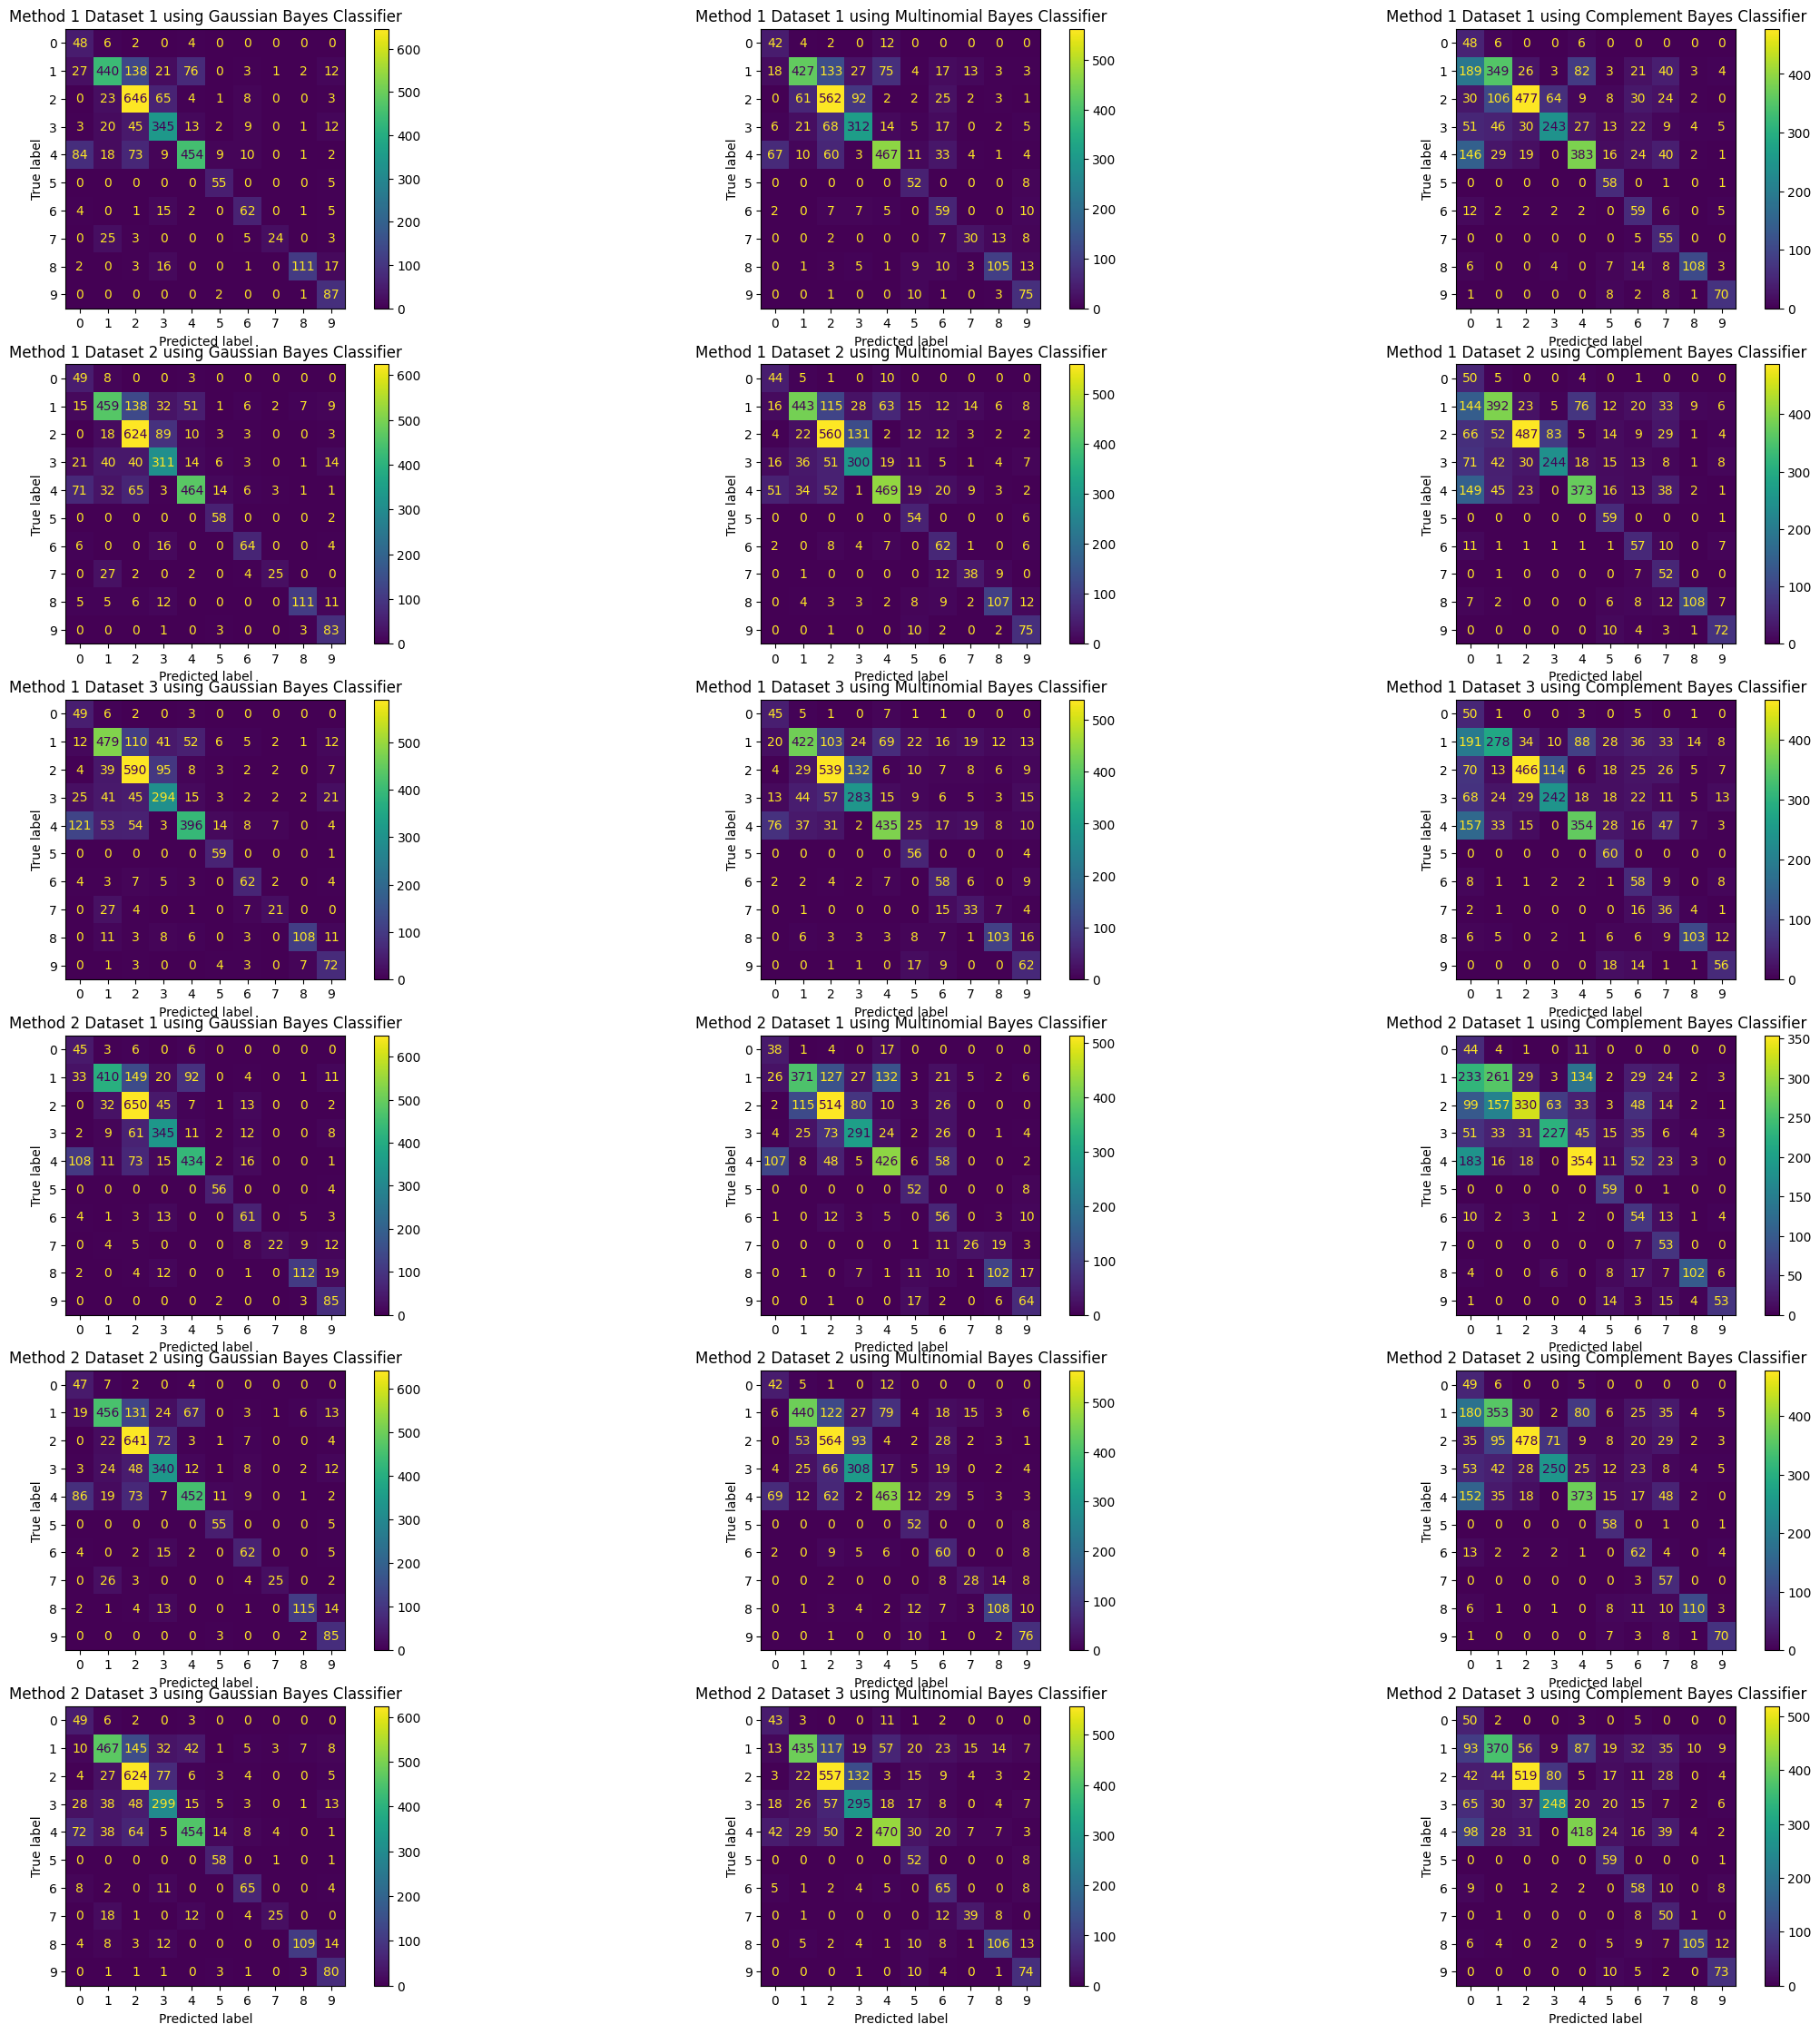

In [79]:
fig, axes = plt.subplots(6,3,figsize=(28,28))
t = 0
for i in range (0,len(datasets)):
    for j in range (0,len(datasets[i])):
        for k in range (0,len(bayes)):
            valuesS = get_confusion_matrix(bayes[k], datasets[i][j][0], balanced_dataset_y, datasets[i][j][1], complete_y_test)
            cm_display = ConfusionMatrixDisplay(valuesS)
            cm_display.plot(ax=axes[t,k])
            axes[t,k].set_title("Method "+str(i+1)+" Dataset "+str(j+1)+" using "+bayes[k].capitalize()+" Bayes Classifier")

        t += 1